In [32]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from helper import *
ndump = get_one_item(['field','diag',0,'ndump'])

In [33]:
# calculate the numerical integration for azimuthal symmetric function f(r)
def N_integrate_r(r,f):
    if len(r) != len(f) or len(r) < 2:
        print('The length of the input argument is Wrong!')
        return 
    integral = 0
    res = [0]
    dr = r[1] - r[0]
    for i in range(1,len(r)):
        r_i = (r[i] + r[i-1]) / 2
        f_i = (f[i] + f[i-1]) / 2
        integral +=  f_i * 2 * np.pi * r_i * dr
        res.append(integral)
    return res

## Calculate the Focusing force according to Benedetti 2017 paper

In [7]:
def H(q):
    if q < 0:
        print('The input cannot be negative!')
        return 
    if q == 0:
        return 1
    return (1 - np.exp(-q)) / q
# r and xi are numbers.
def Wr_benedetti(r,xi,sigma,M_over_m = 1836,nb0_over_n0 = 1000,Zi = 1):
    q = r ** 2 / (2 * sigma ** 2)
    return (r/2) * (1 + Zi * (nb0_over_n0 / 2 / M_over_m) * xi ** 2 * H(q))
# r is a number, xi is an array / xi is a number, r is an array
def Wr(r,xi,sigma,M_over_m = 1836,nb0_over_n0 = 1000,Zi = 1):
    if (type(r) == int or type(r) == float) and (type(xi) == list or type(xi) == np.ndarray):
        return np.array([Wr_benedetti(r,i,sigma,M_over_m,nb0_over_n0,Zi) for i in xi])
    elif (type(xi) == int or type(xi) == float) and (type(r) == list or type(r) == np.ndarray):
        return np.array([Wr_benedetti(i,xi,sigma,M_over_m,nb0_over_n0,Zi) for i in r])
    else:
        print('Wrong input type for r a xi')

# Plot transverse lineout of $F_r$

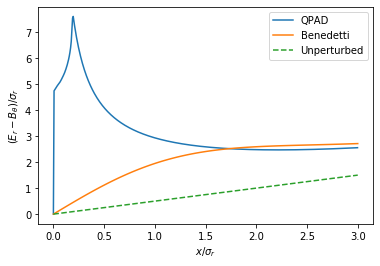

In [10]:
# benedetti prediction
sigma = 0.015
xi = 1.3
r = np.linspace(0,3 * sigma,100)
M_over_m = 1836
nb0_over_n0 = 8000
Zi = 1

Fr = Wr(r,xi,sigma,M_over_m,nb0_over_n0,Zi)

# QPAD simulation result
filename = '../Fields/Fr/Merged_angle_0/fr_'+str(ndump).zfill(8)+'.h5'
lineout_position = xi
x_simu, Fr_simu = get_lineout(filename,'transverse',lineout_position,'QPAD')
# select lineout range
x_simu, Fr_simu = select_lineout_range(x_simu, Fr_simu,0,3 * sigma)
# Plot them together to compare
plt.plot(x_simu/sigma, Fr_simu/sigma,label = 'QPAD')
plt.plot(r/sigma,Fr/sigma,label = 'Benedetti')
plt.plot(r/sigma,0.5*r/sigma,'--',label = 'Unperturbed')
plt.xlabel('$x / \sigma_r$')
plt.ylabel('$(E_r - B_{\\theta}) / \sigma_r$')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

# Plot longitudinal lineout of $F_r$

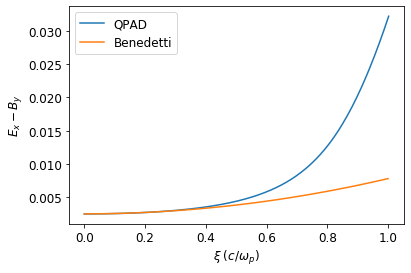

In [29]:
# benedetti prediction
r = 0.005
xi = np.linspace(0,1,100)
sigma = 0.015
M_over_m = 1836
nb0_over_n0 = 8000
Zi = 1

Fr = Wr(r,xi,sigma,M_over_m,nb0_over_n0,Zi)

# QPAD simulation result
filename = '../Fields/Fr/Merged_angle_0/fr_'+str(ndump).zfill(8)+'.h5'
lineout_position = r
xi_simu, Fr_simu = get_lineout(filename,'longitudinal',lineout_position,'QPAD')
# select lineout range
xi_simu, Fr_simu = select_lineout_range(xi_simu, Fr_simu,xi_simu[0],1)
# Plot them together to compare
plt.plot(xi_simu, Fr_simu,label = 'QPAD')
plt.plot(xi,Fr,label = 'Benedetti')
plt.xlabel('$\\xi \\;(c/\\omega_p)$')
plt.ylabel('$E_x - B_y$')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

# Plot transverse lineout of $\rho_i$

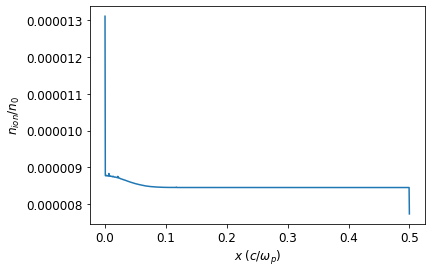

In [5]:
# Get lineout 
filename = '../Species1/Charge/Merged_angle_0/charge_'+str(ndump).zfill(8)+'.h5'
lineout_position = 0.0
x, ni = get_lineout(filename,'transverse',lineout_position,'QPAD')

# select visualization range
x_min = 0.0
x_max = 0.5

x, ni = select_lineout_range(x, ni, x_min, x_max)

### Plot the data
plt.plot(x, ni)
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 12})
plt.show()

# Plot longitudinal lineout of $\rho_i$

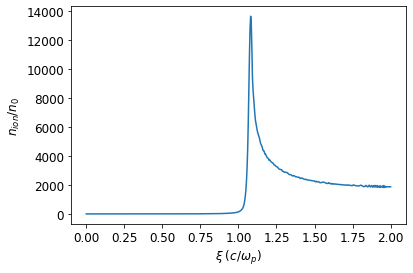

In [34]:
# Get lineout 
filename = '../Species1/Charge/Merged_angle_0/charge_'+str(ndump).zfill(8)+'.h5'
lineout_position = 0.0
xi, ni = get_lineout(filename,'longitudinal',lineout_position,'QPAD')

# select visualization range
xi, ni = select_lineout_range(xi, ni, xi[0], xi[-1])

### Plot the data
plt.plot(xi, ni)
plt.xlabel('$\\xi \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 12})
plt.show()

# Verify $\nabla_\perp \cdot \textbf{F}_\perp = \rho_i$ (or $ F_r (r) 2 \pi r = \int_0^r \rho_i(r') 2 \pi r' dr'$) inside ion channel

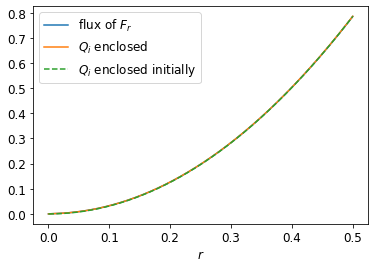

In [162]:
# get Fr
file_number = 3000
lineout_position_xi = 1.0
r_cutoff = 0.5

# The flux of Fr
filename = '../Fields/Fr/Merged_angle_0/fr_'+str(file_number).zfill(8)+'.h5'
r, Fr = get_lineout(filename,'transverse',lineout_position_xi,'QPAD')
r = r[int((len(r) - 1) / 2):]
Fr = Fr[int((len(Fr) - 1) / 2):]

delta_r = r[1] - r[0]
idx = int(r_cutoff / delta_r)

flux = Fr * 2 * np.pi * r
plt.plot(r[:idx+1],flux[:idx+1],label = 'flux of $F_r$')

# The total Q_i enclosed
filename = '../Species1/Charge/Merged_angle_0/charge_'+str(file_number).zfill(8)+'.h5'
r, rho_i = get_lineout(filename,'transverse',lineout_position_xi,'QPAD')
r = r[int((len(r) - 1) / 2):]
rho_i = rho_i[int((len(rho_i) - 1) / 2):]
Q_i = N_integrate_r(r,rho_i)
plt.plot(r[:idx+1],Q_i[:idx+1],label = '$Q_i$ enclosed')


# The total Q_i enclosed initially

Q_i_initial = N_integrate_r(r,np.ones(len(r)))
plt.plot(r[:idx+1],Q_i_initial[:idx+1],'--',label = '$Q_i$ enclosed initially')

plt.xlabel('$r$')
plt.legend()
plt.show()

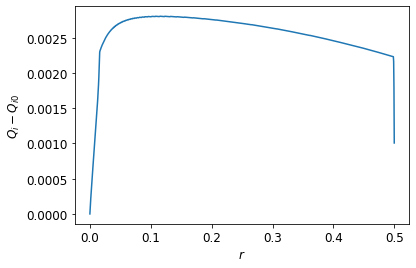

In [45]:
plt.plot(r[:idx+1],np.array(Q_i[:idx+1]) - np.array(Q_i_initial[:idx+1]),label = '$Q_i - Q_{i0}$ enclosed')

plt.xlabel('$r$')
plt.ylabel('$Q_i - Q_{i0}$')
plt.show()

## Plot the lineout of $F_r$, $\rho_i$, and $\rho_b$ together

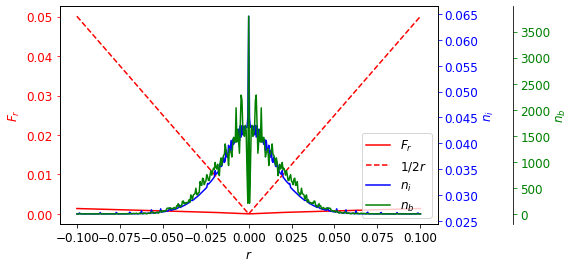

In [165]:
file_number = 300
lineout_position_xi = 1.0
r_cutoff = 0.1

### Fr
filename = '../Fields/Fr/Merged_angle_0/fr_'+str(file_number).zfill(8)+'.h5'
r, Fr = get_lineout(filename,'transverse',lineout_position_xi,'QPAD')
r, Fr = select_lineout_range(r, Fr,-r_cutoff,r_cutoff)

### rho_i

filename = '../Species1/Charge/Merged_angle_0/charge_'+str(file_number).zfill(8)+'.h5'
r, rho_i = get_lineout(filename,'transverse',lineout_position_xi,'QPAD')
r, rho_i = select_lineout_range(r, rho_i,-r_cutoff,r_cutoff)

### rho_b

filename = '../Beam1/Charge/Merged_angle_0/charge_'+str(file_number).zfill(8)+'.h5'
r, rho_b = get_lineout(filename,'transverse',lineout_position_xi,'QPAD')
r, rho_b = select_lineout_range(r, rho_b,-r_cutoff,r_cutoff)
n_b = -rho_b

### Plot them together

fig, ax = plt.subplots()
fig.subplots_adjust(right=1.00)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.

twin2.spines['right'].set_position(("axes", 1.2))
twin3.spines['right'].set_position(("axes", 1.4))

p0, = ax.plot(r, Fr, "r", label="$F_r$")
p00, = ax.plot(r, 0.5 * np.abs(r), "r--", label="$1/2 r$")
p1, = twin1.plot(r, rho_i, "b", label="$n_i$")
p2, = twin2.plot(r, n_b, "g", label="$n_b$")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("$r$")
ax.set_ylabel("$F_r$")
twin1.set_ylabel("$n_i$")
twin2.set_ylabel("$n_b$")

ax.yaxis.label.set_color(p0.get_color())
twin1.yaxis.label.set_color(p1.get_color())
twin2.yaxis.label.set_color(p2.get_color())

ax.tick_params(axis='y', colors=p0.get_color())
twin1.tick_params(axis='y', colors=p1.get_color())
twin2.tick_params(axis='y', colors=p2.get_color())
ax.tick_params(axis='x')

ax.legend(handles=[p0, p00, p1, p2],loc = 'lower right')

plt.show()

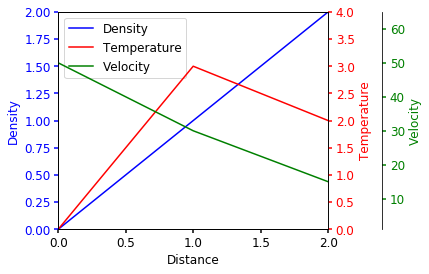

In [91]:
### Example
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# fig.subplots_adjust(right=0.75)

# twin1 = ax.twinx()
# twin2 = ax.twinx()

# # Offset the right spine of twin2.  The ticks and label have already been
# # placed on the right by twinx above.

# twin2.spines['right'].set_position(("axes", 1.2))

# p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
# p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
# p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

# ax.set_xlabel("Distance")
# ax.set_ylabel("Density")
# twin1.set_ylabel("Temperature")
# twin2.set_ylabel("Velocity")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

# tkw = dict(size=4, width=1.5)
# ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
# twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
# twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# ax.tick_params(axis='x', **tkw)

# ax.legend(handles=[p1, p2, p3])

# plt.show()